In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Datos ya limpios
#Gender 0 Male y 1 Female
#Customer Type 0 Loyal customer y 1 Disloyal Customer
#Type of Travel 0 personal travel y 1 business travel
#Class 0 business, 1 eco y 2 eco plus
# Distancia de vuelo en kilómetros 
# Nivel de satisfacción del servicio de WiFi [0-5] 
# Nivel de satisfacción de la conveniencia de hora de despegue y aterrizaje [0-5] 
# Nivel de satisfacción con la facilidad de reserva en línea [0-5] 
# Nivel de satisfacción de la ubicación de puerta de embarque [0-5] 
# Nivel de satisfacción de la comida y bebida a bordo [0-5] 
# Nivel de satisfacción con el embarque en línea [0-5]
# Nivel de satisfacción con la comodidad del asiento [0-5] 
# Nivel de satisfacción con el entretenimiento a bordo [0-5] 
# Nivel de satisfacción con el servicio de abordaje [0-5] 
# Nivel de satisfacción con el espacio para las piernas [0-5] 
# Nivel de satisfacción con el manejo de equipaje [0-5] 
# Nivel de satisfacción con el servicio de check-in [0-5] 
# Nivel de satisfacción con el servicio a bordo [0-5] 
# Nivel de satisfacción con la limpieza [0-5] 
# Retraso en la salida en minutos 
# Retraso en la llegada en minutos 
# Satisfaction 0 neutral or dissatisfied y 1 satisfied

In [5]:
df = pd.read_csv("datasets/clean_train.csv")
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,1,23,1,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,0,49,1,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,1,30,1,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,1,22,1,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


**1 ¿Cuál es el nivel general de satisfacción de los pasajeros?,¿cuáles son los porcentajes?**

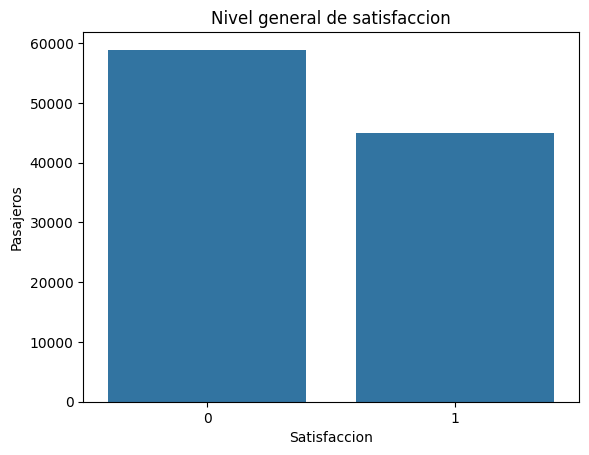

In [6]:
sns.countplot(x='satisfaction', data=df)
plt.title('Nivel general de satisfaccion')
plt.xlabel('Satisfaccion')
plt.ylabel('Pasajeros')
plt.show()

In [7]:
contador = df['satisfaction'].value_counts(normalize=True) * 100
print(f"Hay {contador[1].round()}% personas satisfechas")
print(f"Hay {contador[0].round()}% personas instatisfechas o neutrales")

Hay 43.0% personas satisfechas
Hay 57.0% personas instatisfechas o neutrales


**2. ¿Cómo varía la satisfacción según el género de los pasajeros?**

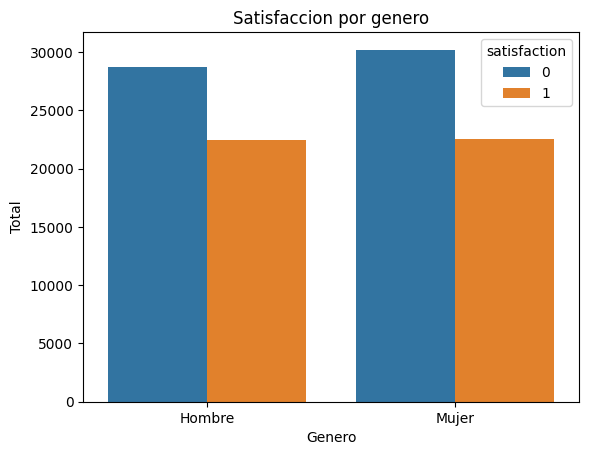

In [8]:
sns.countplot(x='Gender', hue='satisfaction', data=df)
plt.title('Satisfaccion por genero')
plt.xlabel('Genero')
plt.ylabel('Total')
plt.xticks([0, 1], ['Hombre', 'Mujer'])
plt.show()

*En cuestion de satisfaccion vemos segun el grafico que son muy similares pero donde varia es instatisfecho o neutral que vemos que las mujeres tienden mas a tener ese comportamiento
que los hombes*

**3. ¿Hay diferencias significativas según el grupo de edad?**

In [9]:
max_age = df['Age'].max()
min_age = df['Age'].min()
segmento = ((max_age-min_age)/5).round()
segmento

16.0

*Segmentamos las edades en grupos de 5*

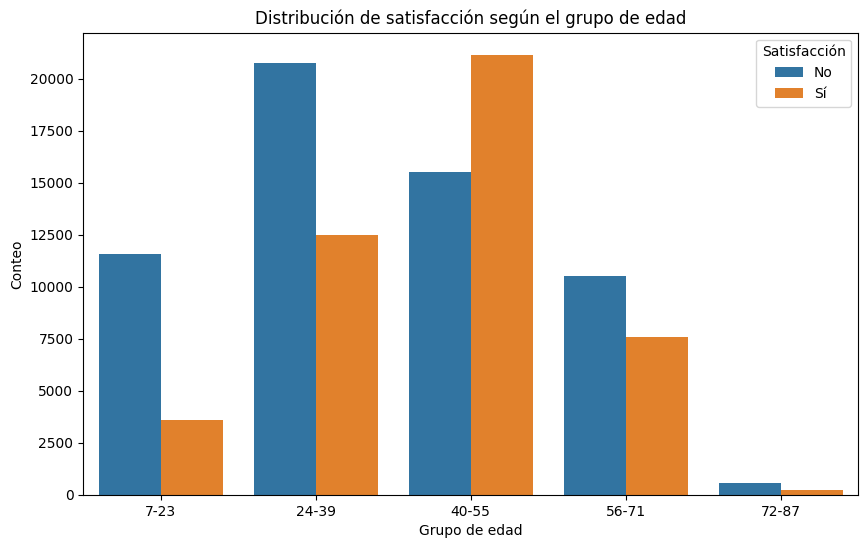

In [10]:
bins = [7, 23, 39, 55, 71, 87]
labels = ['7-23', '24-39', '40-55', '56-71', '72-87']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_group', hue='satisfaction', data=df)
plt.title('Distribución de satisfacción según el grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Conteo')
plt.legend(title='Satisfacción', labels=['No', 'Sí'])
plt.show()

*Logramos apreciar que el grupo de gente con mas gente satisfecha esta entre 40-55 años*

In [11]:
df=df.drop(columns=["Age_group"])

**4. ¿Qué diferencias existen en la satisfacción entre clientes leales y no leales?**

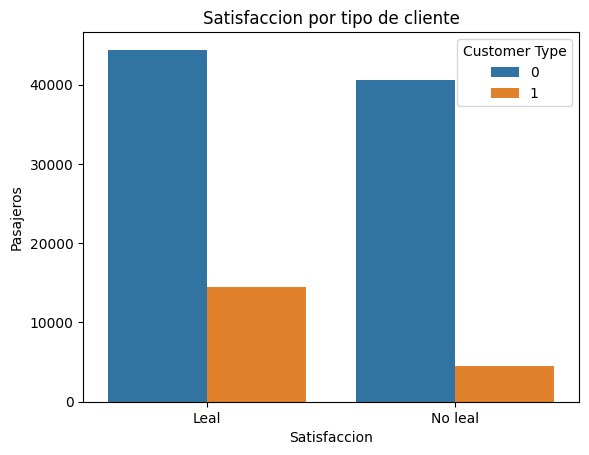

In [12]:
sns.countplot(x='satisfaction', hue='Customer Type', data=df)
plt.title('Satisfaccion por tipo de cliente')
plt.xlabel('Satisfaccion')
plt.ylabel('Pasajeros')
plt.xticks([0,1], ['Leal','No leal'])
plt.show()

*Vemos que los clientes leales son los que tienden a estar insatisfecho o neutrales y tambien mas satisfechos que los no leales*

**5. ¿Cómo afecta el tipo de viaje (Personal vs. de Negocios) la satisfacción del pasajero?**

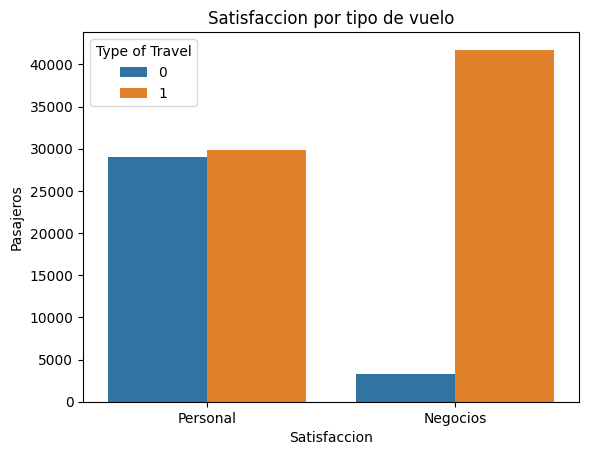

In [13]:
sns.countplot(x='satisfaction', hue='Type of Travel', data=df)
plt.title('Satisfaccion por tipo de vuelo')
plt.xlabel('Satisfaccion')
plt.ylabel('Pasajeros')
plt.xticks([0,1], ['Personal','Negocios'])
plt.show()

*Hay una diferencia notable que cuando es viaje de negocios son mas satisfechos las personas*

**6. ¿Qué servicios influyen más en la satisfacción general del pasajero (wifi, entretenimiento a bordo, 
comodidad del asiento, etc.)?**

In [15]:
servicios = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
    'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]
corr_matrix = df[servicios + ['satisfaction']].corr()
correlacion = corr_matrix['satisfaction'].drop('satisfaction')
correlacion = correlacion.sort_values(ascending=False)
correlacion

Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Gate location                        0.000682
Departure/Arrival time convenient   -0.051601
Name: satisfaction, dtype: float64

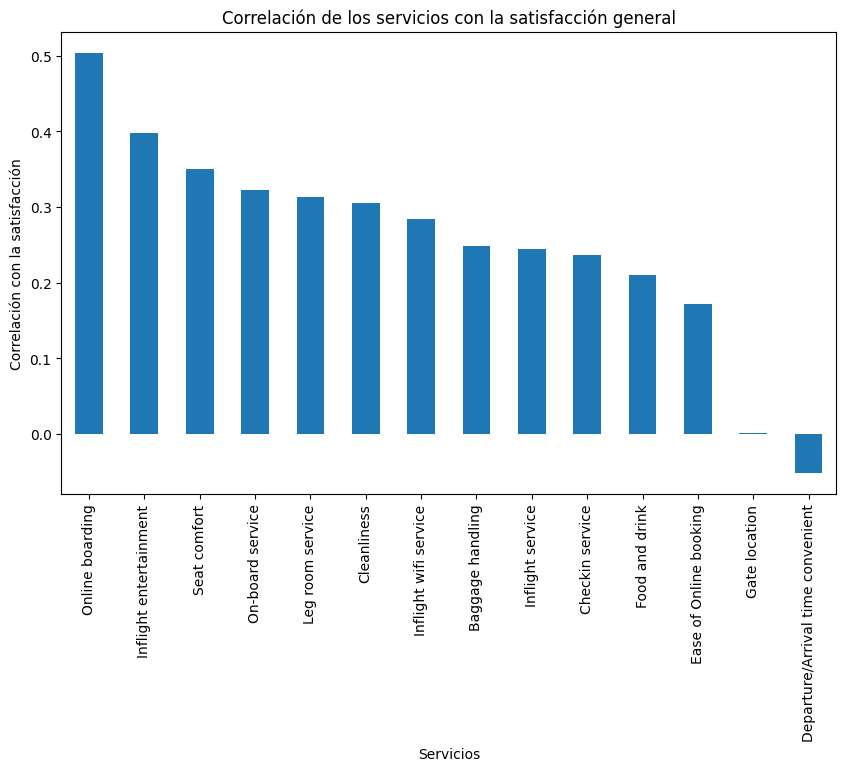

In [16]:
correlacion.plot(kind='bar', figsize=(10, 6))
plt.title('Correlación de los servicios con la satisfacción general')
plt.xlabel('Servicios')
plt.ylabel('Correlación con la satisfacción')
plt.show()

*Los 3 servicios que mas afectan son online boarding, inflight entertaiment y seat comfort*

**7. ¿Cuáles son los servicios que satisfacen más y cuáles dejan más insatisfechos a la clase de 
Negocios**

In [17]:
negocios_df = df[df['Class'] == 0]
corr_matrix = negocios_df[servicios + ['satisfaction']].corr()
correlacion = corr_matrix['satisfaction'].drop('satisfaction')
correlacion = correlacion.sort_values(ascending=False)
correlacion

Online boarding                      0.513200
Inflight entertainment               0.509657
On-board service                     0.438009
Leg room service                     0.429782
Seat comfort                         0.428651
Cleanliness                          0.404135
Inflight service                     0.381273
Baggage handling                     0.380919
Checkin service                      0.335662
Food and drink                       0.229936
Inflight wifi service                0.178895
Ease of Online booking               0.069848
Departure/Arrival time convenient    0.018731
Gate location                        0.002391
Name: satisfaction, dtype: float64

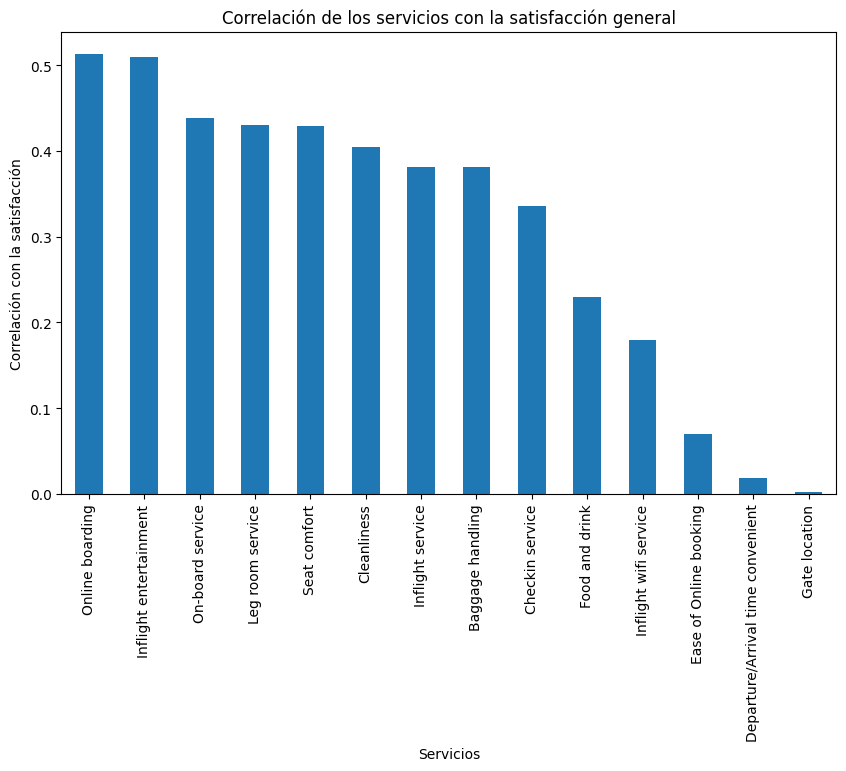

In [18]:
correlacion.plot(kind='bar', figsize=(10, 6))
plt.title('Correlación de los servicios con la satisfacción general')
plt.xlabel('Servicios')
plt.ylabel('Correlación con la satisfacción')
plt.show()

*Los 3 servicios que mas afectan son online boarding, inflight entertaiment y on-board service*

**8. ¿Cómo afecta el retraso en la salida y llegada la satisfacción del pasajero?, ¿hay una correlación?**

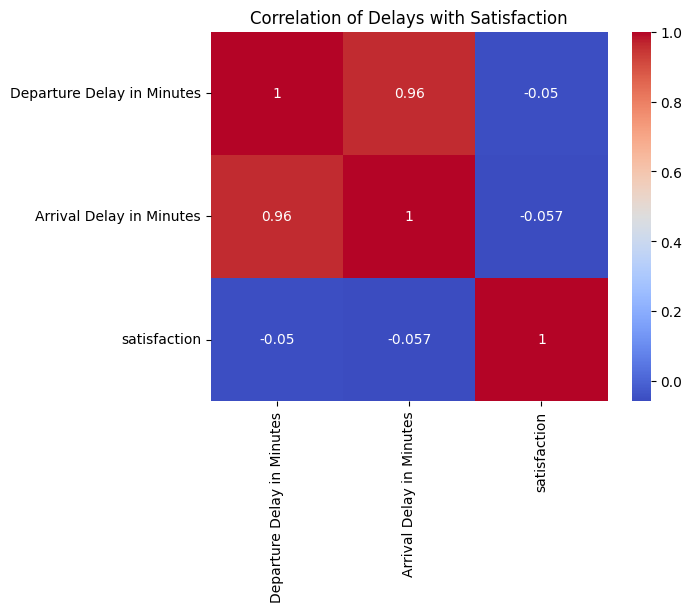

In [21]:
correlation = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Delays with Satisfaction')
plt.show()

**9. ¿Existen correlaciones significativas entre diferentes niveles de satisfacción?**

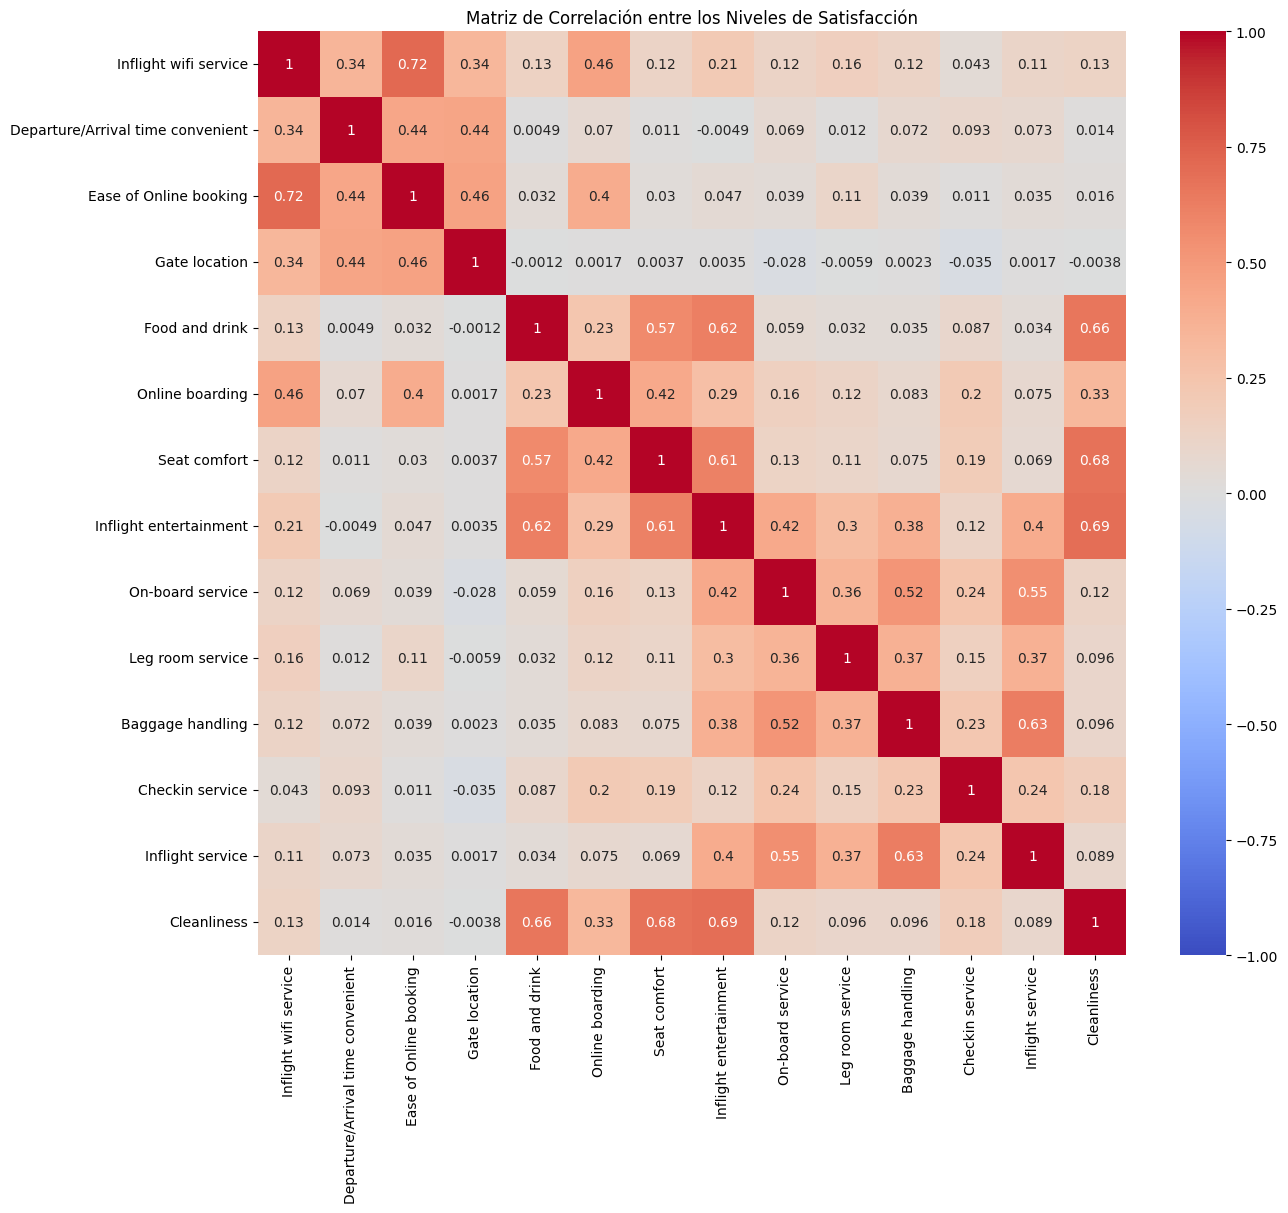

In [25]:
columnas_satisfaccion = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
    'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]
corr = df[columnas_satisfaccion].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre los Niveles de Satisfacción')
plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

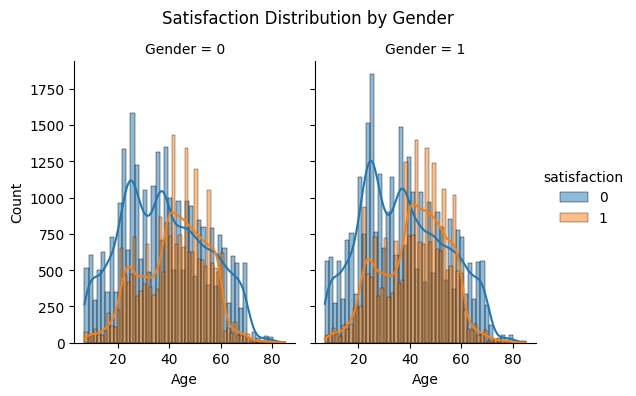

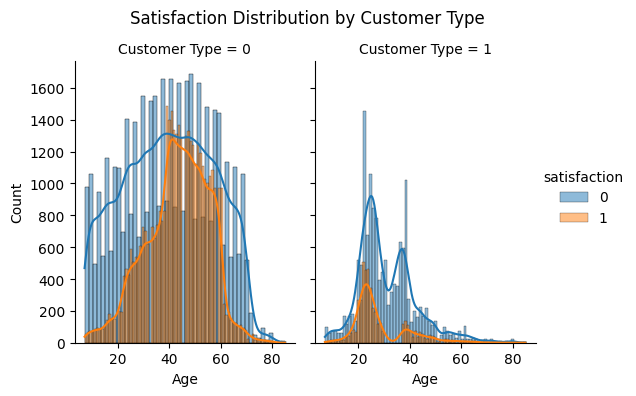

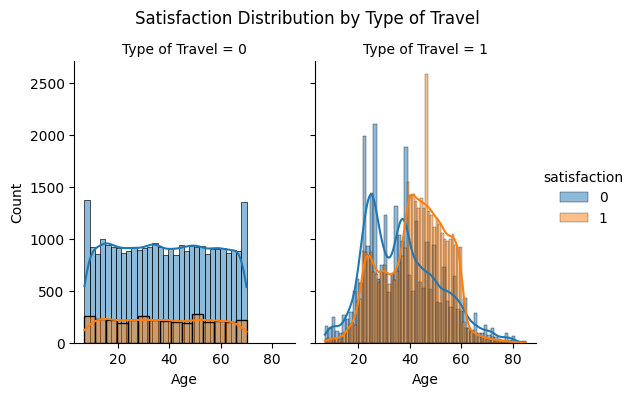

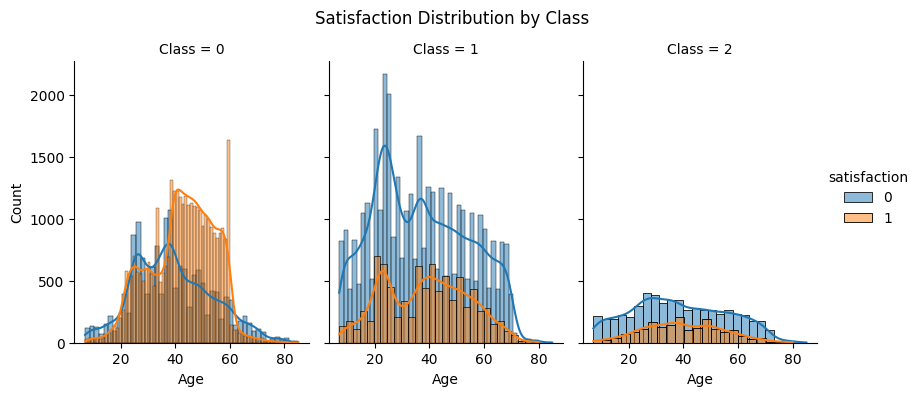

In [29]:
segments = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for segment in segments:
    g = sns.FacetGrid(df, col=segment, hue='satisfaction', height=4, aspect=0.7)
    g.map(sns.histplot, 'Age', kde=True)
    g.add_legend()
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Satisfaction Distribution by {segment}')
    plt.show()